# Import library

In [1]:
#!/usr/bin/env python3
# coding=utf-8

"""Analysis of wine data"""

__author__ = "Rachel Wang"

# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# pygal maps for country distribution
import pygal.maps.world 
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

# Load data 

In [2]:
# load data from csv file
# set index_col = 0 to avoid adding Unnamed: 0 column when use pd.read_csv
wineData = pd.read_csv("/Users/rwang/PycharmProjects/Kaggle_projects/Wine data analysis/winemag-data_first150k.csv", index_col=0)

# First learn data

In [3]:
# check wineData info and describe
wineData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150930 entries, 0 to 150929
Data columns (total 10 columns):
country        150925 non-null object
description    150930 non-null object
designation    105195 non-null object
points         150930 non-null int64
price          137235 non-null float64
province       150925 non-null object
region_1       125870 non-null object
region_2       60953 non-null object
variety        150930 non-null object
winery         150930 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 12.7+ MB


## Result Analysis: 
Except points and price are numeric, others are objects. We will explore the relationship between points and price later.<br>
country, designation, price, province, region_1, and region_2 columns have missing values.

In [4]:
wineData.describe()

,points,price
count,150930.000000,137235.000000
mean,87.888418,33.131482
std,3.222392,36.322536
min,80.000000,4.000000
25%,86.000000,16.000000
50%,88.000000,24.000000
75%,90.000000,40.000000
max,100.000000,2300.000000


## Result Analysis:  
Describe method is perfect to show the statistic info for numeric columns. We could quickly know the statistic information of data. As below:<br> 
The maximum points is 100, minimum is 80. Mean of points is 87.9. The std=3.22 means variance of points is not too much.<br>
The maximum price is 2300, minimum is 4. Mean of price is 33.1. The std is 36.32. It is a large value means price column has a big difference.

In [5]:
# check duplicated rows. Many rows are duplicated.
wineData.duplicated().value_counts()

False    97851
True     53079
dtype: int64

In [6]:
duplicateRows = wineData[wineData.duplicated()]
 
#print("Duplicate Rows except first occurrence based on all columns are :")
#print(duplicateRows)

# remove duplicated rows 
wineData.drop_duplicates(inplace=True)

In [7]:
# check basic info. No much change
wineData.info()
wineData.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97851 entries, 0 to 149639
Data columns (total 10 columns):
country        97848 non-null object
description    97851 non-null object
designation    67955 non-null object
points         97851 non-null int64
price          89131 non-null float64
province       97848 non-null object
region_1       81919 non-null object
region_2       39491 non-null object
variety        97851 non-null object
winery         97851 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 8.2+ MB


,points,price
count,97851.000000,89131.000000
mean,87.956730,33.658783
std,3.218138,37.670180
min,80.000000,4.000000
25%,86.000000,16.000000
50%,88.000000,25.000000
75%,90.000000,40.000000
max,100.000000,2300.000000


## Result Analysis:
After removing duplicated rows, statistic info does not change too much.

# Again learn data 
## Explore data deeply with questions as beginning.  Column by column
## Questions
- 1. How is the country distibution in the whole world? Which ones are the top 10 in quantity? 
- 2. What are points within these top 10 countries? Is mean of points in top 10 countries greater than, equal, or less than the whole mean of points?
- 3. Is there a relationship between description and points or price? (text study will do in another notebook)
- 4. What are the distribution of price and points? What is the relationship between price and points? (positive correlation?)
- 5. Which varieties are popular ranking as top 10? Within popular top 10 varities, which ones have the higher price and higher points?
- 6. Create a wine recommendation system.

### How is the country distibution in the whole world? Which ones are the top 10 in quantity? What are points within these top 10 countries?
#### plot world map show country distriburion

In [8]:
# one record for country has problem. change it based on province info
# use loc to assign modification to dataframe
wineData.loc[wineData['country'] == 'US-France', 'country'] = 'US'

# store all country names to conName_list
country_name = wineData.country.value_counts().index
conName_list = [name for name in country_name]

In [9]:
# use pygal to plot world map. convert country name to the name in COUNTRIES dictionary in pygal
def convert_country_name(country_name):
    '''format country name'''
    for i, name in enumerate(country_name):
        if name == 'US':
            country_name[i] = 'United States'
        elif name == 'Moldova':
            country_name[i] = 'Moldova, Republic of'
        elif name == 'Macedonia':
            country_name[i] = 'Macedonia, the former Yugoslav Republic of'
        elif name == 'England':
            country_name[i] = 'United Kingdom'
        elif name == 'South Korea':
            country_name[i] = 'Korea, Republic of'
    return country_name

In [10]:
def get_countryCode(country_name):
    '''Get country code. The code will be use to draw the country in world map'''
    for code, name in pygal.maps.world.COUNTRIES.items():
        if name == country_name:
            return code
    return None

In [11]:
# convert to code
conName_list = convert_country_name(conName_list)
countryCode = [get_countryCode(name) for name in conName_list ]

In [12]:
# create World instance, draw map and save as svg.
# Please check the svg in your brower
worldmap_chart = pygal.maps.world.World()
worldmap_chart.add('countries', countryCode)
worldmap_chart.render_to_file('country_distribution.svg')

#### plot bar chart and sector chart of the top 10 countries in quantity

Text(0, 0.5, 'Counts')

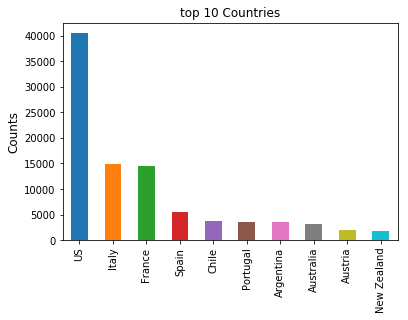

In [16]:
topCountries = wineData.country.value_counts()[0:10]
ax = topCountries.plot(kind='bar', title='top 10 Countries')
plt.ylabel('Counts', fontsize=12)

### Plus a note: 
#### Difference between bar chat and histogram
- 1. A histogram represents the frequency distribution of continuous variables. <br>
     A bar graph is a diagrammatic comparison of discrete variables. 
- 2. Histogram presents numerical data whereas bar graph shows categorical data. 
- 3. The histogram is drawn in such a way that there is no gap between the bars.

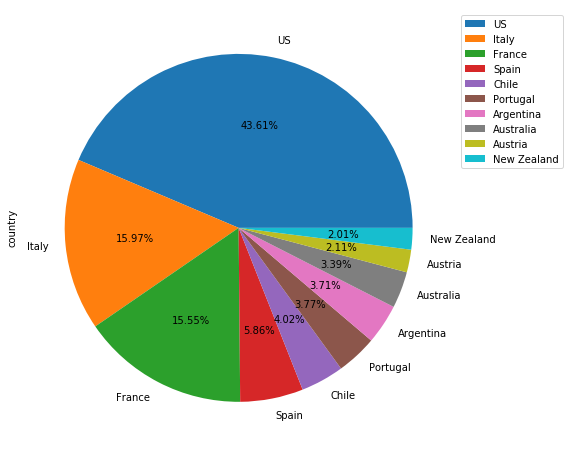

In [17]:
top_country=wineData.country.value_counts()[:10]
top_country.plot(kind='pie',autopct='%.2f%%',figsize=(8,8))
plt.legend(bbox_to_anchor=(1,1))  

### Result analysis:
US produces the most wines which are in the market. The quantity is much more than the second country Italy.<br>
US, Italy, and France share 75% wine market in quantity. Even New Zealand is the top 10 country, it only takes 2.01% ratio of the whole wine market. So other counties will take very small market.

### What are points within these top 10 countries? Is mean of points in top 10 countries greater than, equal, or less than the whole mean of points?

In [39]:
# select data whose country is in above 10 countries
topCountriesDf = wineData[wineData.country.isin(top_country.index)]
print(f'Mean of wine points in top 10 countries compares with mean of points in whole data:')
print(topCountriesDf.groupby('country').points.mean() >= wineData.points.mean())

Mean of wine points in top 10 countries compares with mean of points in whole data:
country
Argentina      False
Australia       True
Austria         True
Chile          False
France          True
Italy           True
New Zealand    False
Portugal        True
Spain          False
US             False
Name: points, dtype: bool


### Result analysis:
US which is NO.1 has lower mean than the whole data. Even thought it produces the most wines, some wines have bad tasty. Italy and France have good performance in points. They produce many wines and keep good tasty. Even Australia, Austria, and Portugal does not share much market, they have higher mean of points. They produce a fewer wines, but they garauntee every wine tasty.

#### plot boxplot for top 10 countries with points column

[Text(0, 0, 'US'),
 Text(0, 0, 'Spain'),
 Text(0, 0, 'France'),
 Text(0, 0, 'Italy'),
 Text(0, 0, 'New Zealand'),
 Text(0, 0, 'Argentina'),
 Text(0, 0, 'Australia'),
 Text(0, 0, 'Portugal'),
 Text(0, 0, 'Chile'),
 Text(0, 0, 'Austria')]

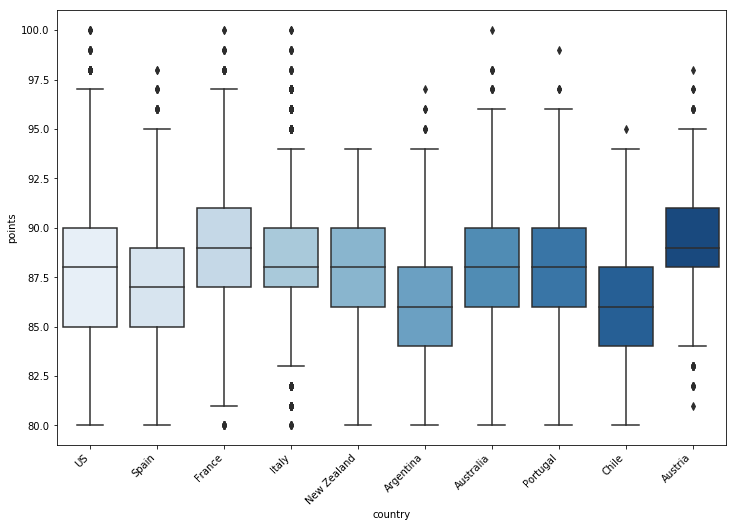

In [40]:
# plot boxplot
plt.figure(figsize=(12, 8))
ax = sns.boxplot(x='country', y="points", data=topCountriesDf, palette="Blues")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

### Result analysis:
Plus analysis<br>
- 1. US takes the largest market share. The median of points is good enough. It has highest points(100).
- 2. Spain are not good in points. The overall tasety in Spain needs to improve.
- 3. France performs pretty good in points. It has higher median points. It has fewer wines with lowest points(80) and some wines with highest points(100). 
- 4. Argentina and Chile have the worst performance in points. They need to improve the quality of wines.
- 5. Although Austria does not take a very large market share, it has the highest median. It means the whole wine point within Austria is better than other 9 countries. No the highest points(100) wine in Austria, also no the lowest points(80) in Austria.

### Conclusion
Only consider about overall points, the France is a good country to choose wines.

### What are the distribution of price and points? What is the relationship between price and points? (positive correlation?)

Text(0, 0.5, 'Counts')

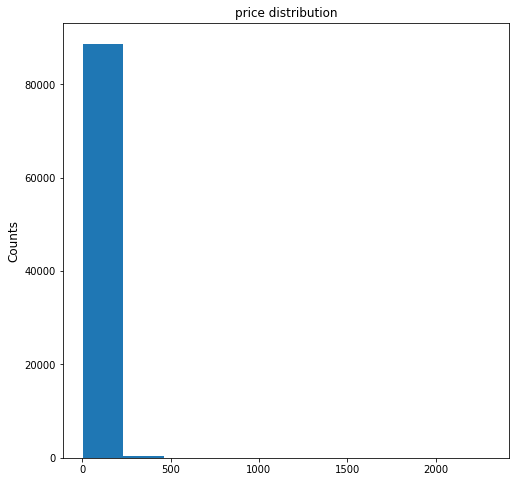

In [44]:
# polt price distribution
plt.figure(figsize=(8,8))
ax = wineData.price.dropna().plot(kind='hist', title='price distribution')
plt.ylabel('Counts', fontsize=12)

### Result analysis:
Most price of wines are less than 200. Price is greater than 500 has fewer counts. The wines with price greater than 500 belong to senior wine. 

Text(0, 0.5, 'Counts')

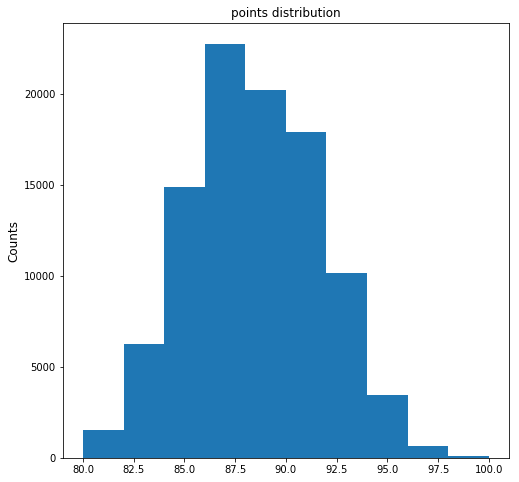

In [50]:
# polt points distribution
plt.figure(figsize=(8,8))
ax = wineData.points.plot(kind='hist', title='points distribution')
plt.ylabel('Counts', fontsize=12)

In [51]:
# use mathmatic to prove most price is less than 200
# more than 90% price of wines is less than 200
price_less200 = wineData.loc[wineData['price'] < 200]
price_greater500 = wineData.loc[wineData['price'] > 500]
ratio_less200 = len(price_less200) / len(wineData)
ratio_greater500 = len(price_greater500) / len(wineData)
f'The ratio of price less 200 is {ratio_less200} and the ratio of price greater than 500 is {ratio_greater500}.'

'The ratio of price less 200 is 0.9049881963393323 and the ratio of price greater than 500 is 0.0005518594597909066.'

In [52]:
# find the relationship between price and points
all_pricePoint = wineData['price'].corr(wineData['points'])
less200_pricePoint = price_less200['price'].corr(price_less200['points'])
print(f'The overall correlation coefficient for price and points is {all_pricePoint}.')
print(f'The correlation coefficient for price less than 200 and points is {less200_pricePoint}.')

The overall correlation coefficient for price and points is 0.44735483119723424.
The correlation coefficient for price less than 200 and points is 0.5435706739459415.


### Result analysis:
when limit the range of price, the positive correlation is stronger. <br>
Thus, it has other factors to impact the price of wines when the price becomes higher. <br>
For example, the cost of commerical.

#### plot regression for price less than 200 and points

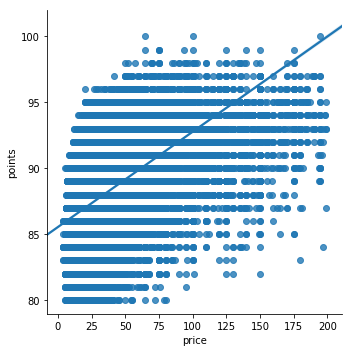

In [61]:
sns.lmplot(x='price',y='points',data= price_less200)

#### Build a linear model

In [62]:
x = np.array(price_less200['price']).reshape(-1, 1)
y = np.array(price_less200['points']).reshape(-1, 1)
reg = linear_model.LinearRegression()
reg.fit(x, y)
intercept = reg.intercept_
coef = reg.coef_
print('Intercept: \n', intercept)
print('Coefficients: \n', coef)
print('Regression model is:')
print(f'y={coef}*x+{intercept}')

Intercept: 
 [85.53587271]
Coefficients: 
 [[0.07224673]]
Regression model is:
y=[[0.07224673]]*x+[85.53587271]


### Result analysis:
#### Tips for wine's choice
The linear model could help choose wines with high cost-effective. When the actual price is greater than predicted price, this wine has high cost-effective.

In [67]:
# store high cost-effective wines to wine_good dataframe. Note: all wine_good with price less than 200.
wine_good= price_less200.copy()
wine_good['points_reg']=coef[0]*wine_good.price + intercept
wine_good = wine_good[wine_good.points > wine_good.points_reg].reset_index(drop=True)

### Which varieties are popular and ranking as top 10?

Text(0, 0.5, 'Counts')

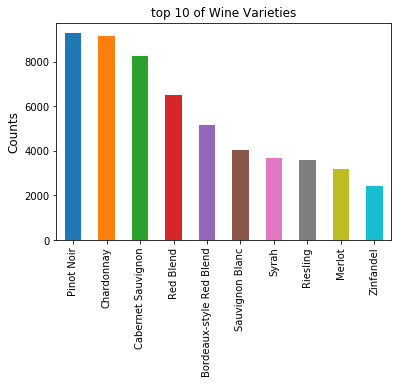

In [68]:
# plot bar chat for varitiy
topVarieties = wineData.variety.value_counts()[0:10]
ax = topVarieties.plot(kind='bar', title='top 10 of Wine Varieties')
plt.ylabel('Counts', fontsize=12)

### Result Analysis:
The top 10 popular wine varieties are: 
- 1. Pinot Noir, 
- 2. Chardonnay, 
- 3. Cabernet Sauvignon, 
- 4. Red Blend, 
- 5. Bordeaux-style Red Blend,
- 6. Sauvignon Blanc,
- 7. Syrah,
- 8. Riesling,
- 9. Merlot
- 10. Zinfandel

[Text(0, 0, 'Cabernet Sauvignon'),
 Text(0, 0, 'Sauvignon Blanc'),
 Text(0, 0, 'Pinot Noir'),
 Text(0, 0, 'Chardonnay'),
 Text(0, 0, 'Syrah'),
 Text(0, 0, 'Red Blend'),
 Text(0, 0, 'Riesling'),
 Text(0, 0, 'Zinfandel'),
 Text(0, 0, 'Bordeaux-style Red Blend'),
 Text(0, 0, 'Merlot')]

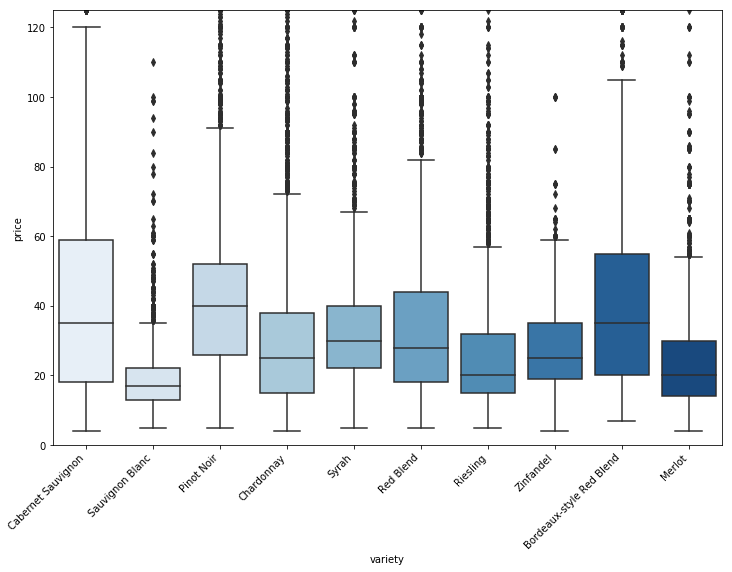

In [69]:
# plot boxplot
# select data which variety is in top 10 varieties
topVaritiesDf = wineData[wineData.variety.isin(topVarieties.index)]

# use sns plot boxplot
plt.figure(figsize=(12, 8))
plt.ylim([0, 125])
ax = sns.boxplot(x='variety', y="price", data=topVaritiesDf, palette="Blues")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

[Text(0, 0, 'Cabernet Sauvignon'),
 Text(0, 0, 'Sauvignon Blanc'),
 Text(0, 0, 'Pinot Noir'),
 Text(0, 0, 'Chardonnay'),
 Text(0, 0, 'Syrah'),
 Text(0, 0, 'Red Blend'),
 Text(0, 0, 'Riesling'),
 Text(0, 0, 'Zinfandel'),
 Text(0, 0, 'Bordeaux-style Red Blend'),
 Text(0, 0, 'Merlot')]

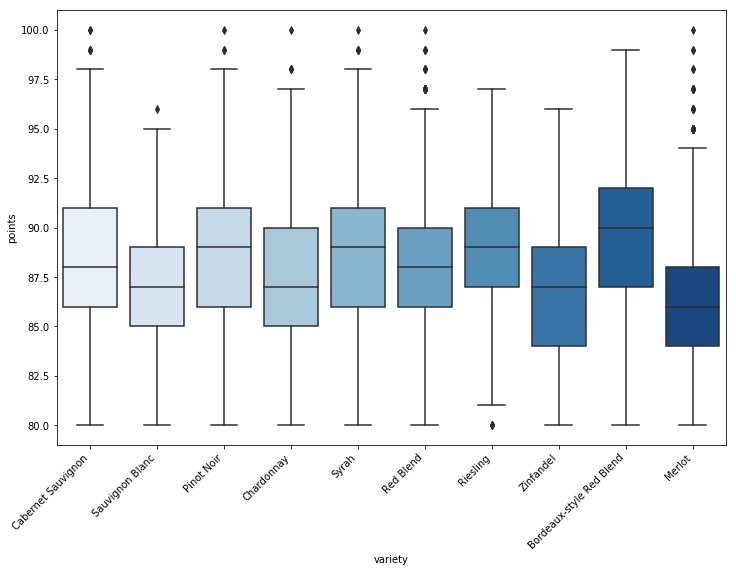

In [70]:
# Draw boxplot to find which varities have higher points
plt.figure(figsize=(12, 8))
ax = sns.boxplot(x='variety', y="points", data=topVaritiesDf, palette="Blues")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

### Result Analysis:
(According to median)
- 1. Bordeaux-style Red Blend, Pinot Noir, and Cabernet Sauvignon have higher price.
- 2. Bordeaux-style Red Blend, Pinot Noir, and Cabernet Sauvignon have higher median of points.



### Conclusion
wines which are more expensive, taste better.

## Create a wine recommend system

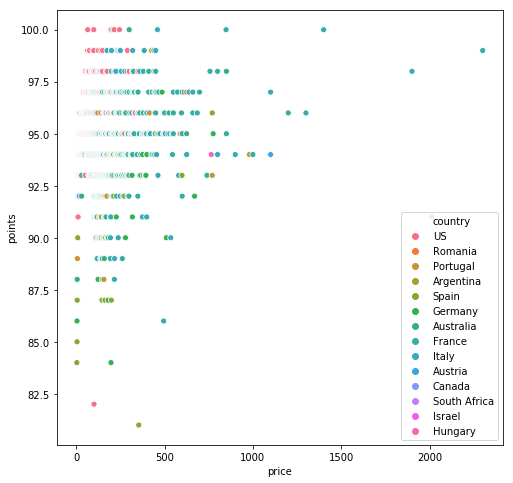

In [72]:
# select top 5 wine based on points in each price group
price_group = list(wineData.groupby('price').points.nlargest(5).reset_index().level_1)
# select the top wine in each price group from original dataset and store as wine_recommend
wine_recommend=wineData.loc[price_group].reset_index(drop=True)

plt.figure(figsize=(8, 8))
sns.scatterplot(y='points',x='price',hue='country',data=wine_recommend)
plt.legend(loc='lower right')

In [73]:
# try to use the wine recommend system
print('Please input a price you expect：')
expect_price = float(input(''))
if expect_price in list(wine_recommend.price):
    temp=wine_recommend[wine_recommend.price==expect_price]
    for i in list(temp.index):
      if temp.loc[i].designation: 
        print('recommend：%s belongs to %s from %s，price: %.1f，points: %.1f.'%(temp.loc[i].designation, temp.loc[i].variety, temp.loc[i].country,temp.loc[i].price,temp.loc[i].points))
      else:
        print('recommend：%s from %s，price: %.1f，points: %.1f.'%(temp.loc[i].variety, temp.loc[i].country, temp.loc[i].price, temp.loc[i].points))
else:
    print('please input an approprate price')
    

Please input a price you expect：
75
recommend：Hirsch Vineyard belongs to Pinot Noir from US，price: 75.0，points: 99.0.
recommend：En Chamberlin Vineyard belongs to Syrah from US，price: 75.0，points: 99.0.
recommend：Rockfall belongs to Cabernet Sauvignon from US，price: 75.0，points: 99.0.
recommend：Coastlands Vineyard belongs to Pinot Noir from US，price: 75.0，points: 98.0.
recommend：Bionic Frog belongs to Syrah from US，price: 75.0，points: 98.0.


### Descripion

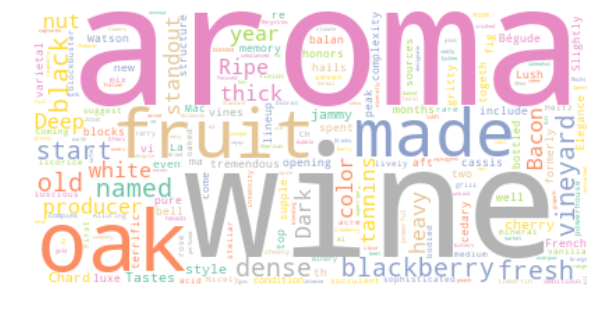

In [80]:
from wordcloud import WordCloud
wc=WordCloud(background_color="white", max_words=200, colormap="Set2")

words=wineData.description
wc.generate(''.join(str(words)))
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

## Conclusion
- 1. US, Italy and France share most of wine market. Italy and France have good performance in points.
- 2. Pinot Noir 、Chardonnay 、Cabernet Sauvignon, etc have top counts. They are common varieties.
- 3. In common varieties, more expensive, wines have better tasty.
- 4. Description keywords: aroma, wine, oak, fruit, made etc.